In [ ]:
from warnings import filterwarnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import PIL
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')


2023-10-26 21:25:50.654626: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
import zipfile

# Replace 'dgx_bt_large_2c.zip' with the actual file path if it's in a different location.
zip_file_path = 'btlarge4cresnet50.zip'

# Replace 'output_directory' with the directory where you want to extract the contents.
#output_directory = 'VGG 16 Model'

# Create the output directory if it doesn't exist.
#import os
#os.makedirs(output_directory, exist_ok=True)

# Unzip the file.
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('ResNet50Large4c7023images dataset')

print(f"File '{zip_file_path}' has been successfully unzipped ResNet50Large4c7023images dataset'.")



File 'btlarge4cresnet50.zip' has been successfully unzipped ResNet50Large4c7023images dataset'.


In [ ]:
img_h = 150
img_w = 150

In [ ]:
import os
import glob as gb
import pandas as pd

trainpath = 'ResNet50Large4c7023images dataset/Training'  # Update this with your actual path
os.listdir(trainpath)
Folder_name = []
folder_item_numbers = []

# Recursively traverse subdirectories
for root, dirs, files in os.walk(trainpath):
    for folder in dirs:
        folder_path = os.path.join(root, folder)
        files = gb.glob(os.path.join(folder_path, '*.jpg'))  # Use os.path.join to construct file paths
        Folder_name.append(folder)
        folder_item_numbers.append(len(files))

informations = pd.DataFrame({'Folder_name': Folder_name, 'Training_Image_Numbers': folder_item_numbers})
print(informations)


  Folder_name  Training_Image_Numbers
0     notumor                    1595
1   pituitary                    1457
2      glioma                    1321
3  meningioma                    1339


In [ ]:
import os
import glob as gb
import pandas as pd

testpath = 'ResNet50Large4c7023images dataset/Testing'  # Update this with your actual path

Folder_name = []
folder_item_numbers = []

# Recursively traverse subdirectories in testpath
for root, dirs, _ in os.walk(testpath):  # Use '_' to ignore the 'files' variable
    for folder in dirs:
        folder_path = os.path.join(root, folder)
        files_in_folder = gb.glob(os.path.join(folder_path, '*.jpg'))  # Use a different variable name
        Folder_name.append(folder)
        folder_item_numbers.append(len(files_in_folder))

informations = pd.DataFrame({'Folder_name': Folder_name, 'Testing_Image_Numbers': folder_item_numbers})
print(informations)



  Folder_name  Testing_Image_Numbers
0     notumor                    405
1   pituitary                    300
2      glioma                    300
3  meningioma                    306


In [ ]:
import os
import glob as gb
import pandas as pd
import cv2
import matplotlib.pyplot as plt

pred = 'Prediction check images/Prediction check images/'

Folder_name = []
folder_item_numbers = []

# Traverse the 'pred' directory for subdirectories
for folder in os.listdir(pred):
    folder_path = os.path.join(pred, folder)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Count images directly within the subdirectory
        files_in_subdirectory = gb.glob(os.path.join(folder_path, '*.jpg'))
        subdirectory_count = len(files_in_subdirectory)

        # Add subdirectory images to the DataFrame
        if subdirectory_count > 0:
            Folder_name.extend([os.path.basename(file) for file in files_in_subdirectory])
            folder_item_numbers.extend([0] * subdirectory_count)

informations = pd.DataFrame({'Folder_name': Folder_name, 'Prediction_Image_Numbers': folder_item_numbers})
print(informations)



        Folder_name  Prediction_Image_Numbers
0    pituitary3.jpg                         0
1       glioma1.jpg                         0
2    pituitary2.jpg                         0
3       glioma2.jpg                         0
4     pituitary.jpg                         0
5       glioma3.jpg                         0
6        glioma.jpg                         0
7    pituitary1.jpg                         0
8   meningioma1.jpg                         0
9    pituitary4.jpg                         0
10   meningioma.jpg                         0
11     no_tumor.jpg                         0
12  meningioma4.jpg                         0
13  meningioma2.jpg                         0
14      glioma4.jpg                         0
15  meningioma3.jpg                         0


In [ ]:
for folder in os.listdir(pred):
    folder_path = os.path.join(pred, folder)
    print("Folder path:", folder_path)

    if os.path.isdir(folder_path):
        files_in_subdirectory = gb.glob(os.path.join(folder_path, '*.jpg'))
        print("Files in subdirectory:", files_in_subdirectory)

Folder path: Prediction check images/Prediction check images/pituitary.jpg
Folder path: Prediction check images/Prediction check images/glioma.jpg
Folder path: Prediction check images/Prediction check images/meningioma.jpg
Folder path: Prediction check images/Prediction check images/no_tumor.jpg
Folder path: Prediction check images/Prediction check images/Prediction check images
Files in subdirectory: ['Prediction check images/Prediction check images/Prediction check images/pituitary3.jpg', 'Prediction check images/Prediction check images/Prediction check images/glioma1.jpg', 'Prediction check images/Prediction check images/Prediction check images/pituitary2.jpg', 'Prediction check images/Prediction check images/Prediction check images/glioma2.jpg', 'Prediction check images/Prediction check images/Prediction check images/pituitary.jpg', 'Prediction check images/Prediction check images/Prediction check images/glioma3.jpg', 'Prediction check images/Prediction check images/Prediction chec

In [ ]:
#ignore cell
import os
import cv2
import matplotlib.pyplot as plt

# Read the first image if Folder_name is not empty
if Folder_name:
    first_image_path = os.path.join(pred, Folder_name[0])  # Get the path of the first image

    # Check if the image file exists
    if os.path.exists(first_image_path):
        # Attempt to load the image
        image = cv2.imread(first_image_path)

        # Check if the image was loaded successfully
        if image is not None:
            # Convert BGR to RGB for displaying with matplotlib
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Display the image
            plt.imshow(rgb_image)
            plt.show()
        else:
            print("Failed to load the image. Image may be empty or corrupted.")
    else:
        print("Image file does not exist at the specified path:", first_image_path)
else:
    print("Folder_name is empty.")


Image file does not exist at the specified path: Prediction check images/Prediction check images/pituitary3.jpg


In [ ]:
import os
import glob as gb
import cv2

new_size = 224
X_train = []
y_train = []

for folder in os.listdir(trainpath):
    print('Folder name is:', folder)
    files = gb.glob(os.path.join(trainpath, folder, '*.jpg'))
    print('Number of images in folder:', len(files))
    print('Start reading images')

    for file in files:
        image_class = {'pituitary': 0, 'notumor': 1, 'meningioma': 2, 'glioma': 3}
        print('Reading image:', file)

        original_image = cv2.imread(file)

        if original_image is None:
            print('Failed to load image:', file)
            continue  # Skip this image if loading fails

        image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, (new_size, new_size))

        X_train.append(resized_image)
        y_train.append(image_class[folder])

    print('Image reading finished')

print('--------------------------------------------------')
# Check items in X_train
print("Items in X_train:", len(X_train), "items")
print("Items in y_train:", len(y_train), "items")


Folder name is: notumor
Number of images in folder: 1595
Start reading images
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_1177.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_0100.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_0887.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_0722.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_1323.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_0911.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_0795.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_0891.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_1339.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_0677.jpg
Reading image: ResNet50Large4c7023images dataset/Training/notumor/Tr-no_1136.jpg
Reading image: ResNet50Large4c7

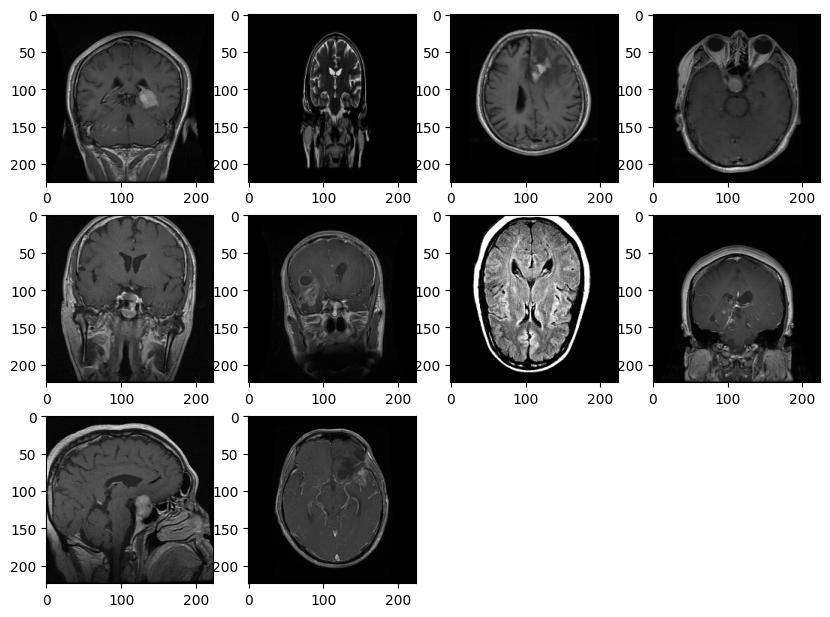

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check the length of X_train to ensure it's valid
if len(X_train) > 0:
    plt.figure(figsize=(10, 10))
    for n, i in enumerate(list(np.random.randint(0, len(X_train), 10))):
        plt.subplot(4, 4, n + 1)
        plt.imshow(X_train[i])
else:
    print("X_train is empty or has an invalid length.")


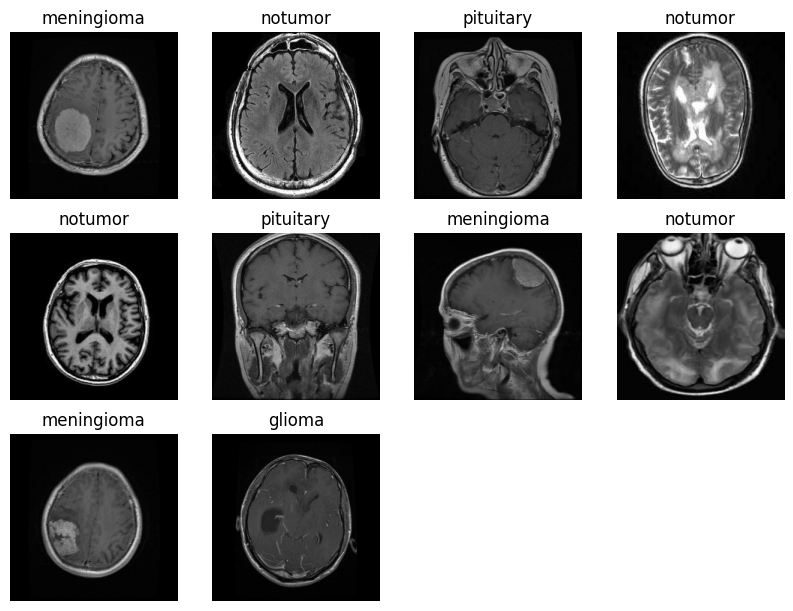

In [ ]:
#showing training images with labels
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),10))) :
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])
    plt.axis('off')
    classes  = {'pituitary':0, 'notumor':1, 'meningioma':2, 'glioma':3}

    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [ ]:
#loading data and resize it and collect it in one folder
new_size = 224
X_test = []
y_test = []

for folder in os.listdir(testpath):
    print('Folder name is:', folder)
    files = gb.glob(os.path.join(testpath, folder, '*.jpg'))
    print('Number of images in folder:', len(files))
    print('Start reading images')

    for file in files:
        image_class = {'pituitary': 0, 'notumor': 1, 'meningioma': 2, 'glioma': 3}
        print('Reading image:', file)

        original_image = cv2.imread(file)

        if original_image is None:
            print('Failed to load image:', file)
            continue  # Skip this image if loading fails

        image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, (new_size, new_size))

        X_test.append(resized_image)
        y_test.append(image_class[folder])

    print('Image reading finished')

print('--------------------------------------------------')
# Check items in X_train
print("Items in X_test:", len(X_test), "items")
print("Items in y_test:", len(y_test), "items")

Folder name is: notumor
Number of images in folder: 405
Start reading images
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0204.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0269.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0224.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0158.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0071.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0122.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0168.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0380.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0064.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0225.jpg
Reading image: ResNet50Large4c7023images dataset/Testing/notumor/Te-no_0333.jpg
Reading image: ResNet50Large4c7023images da

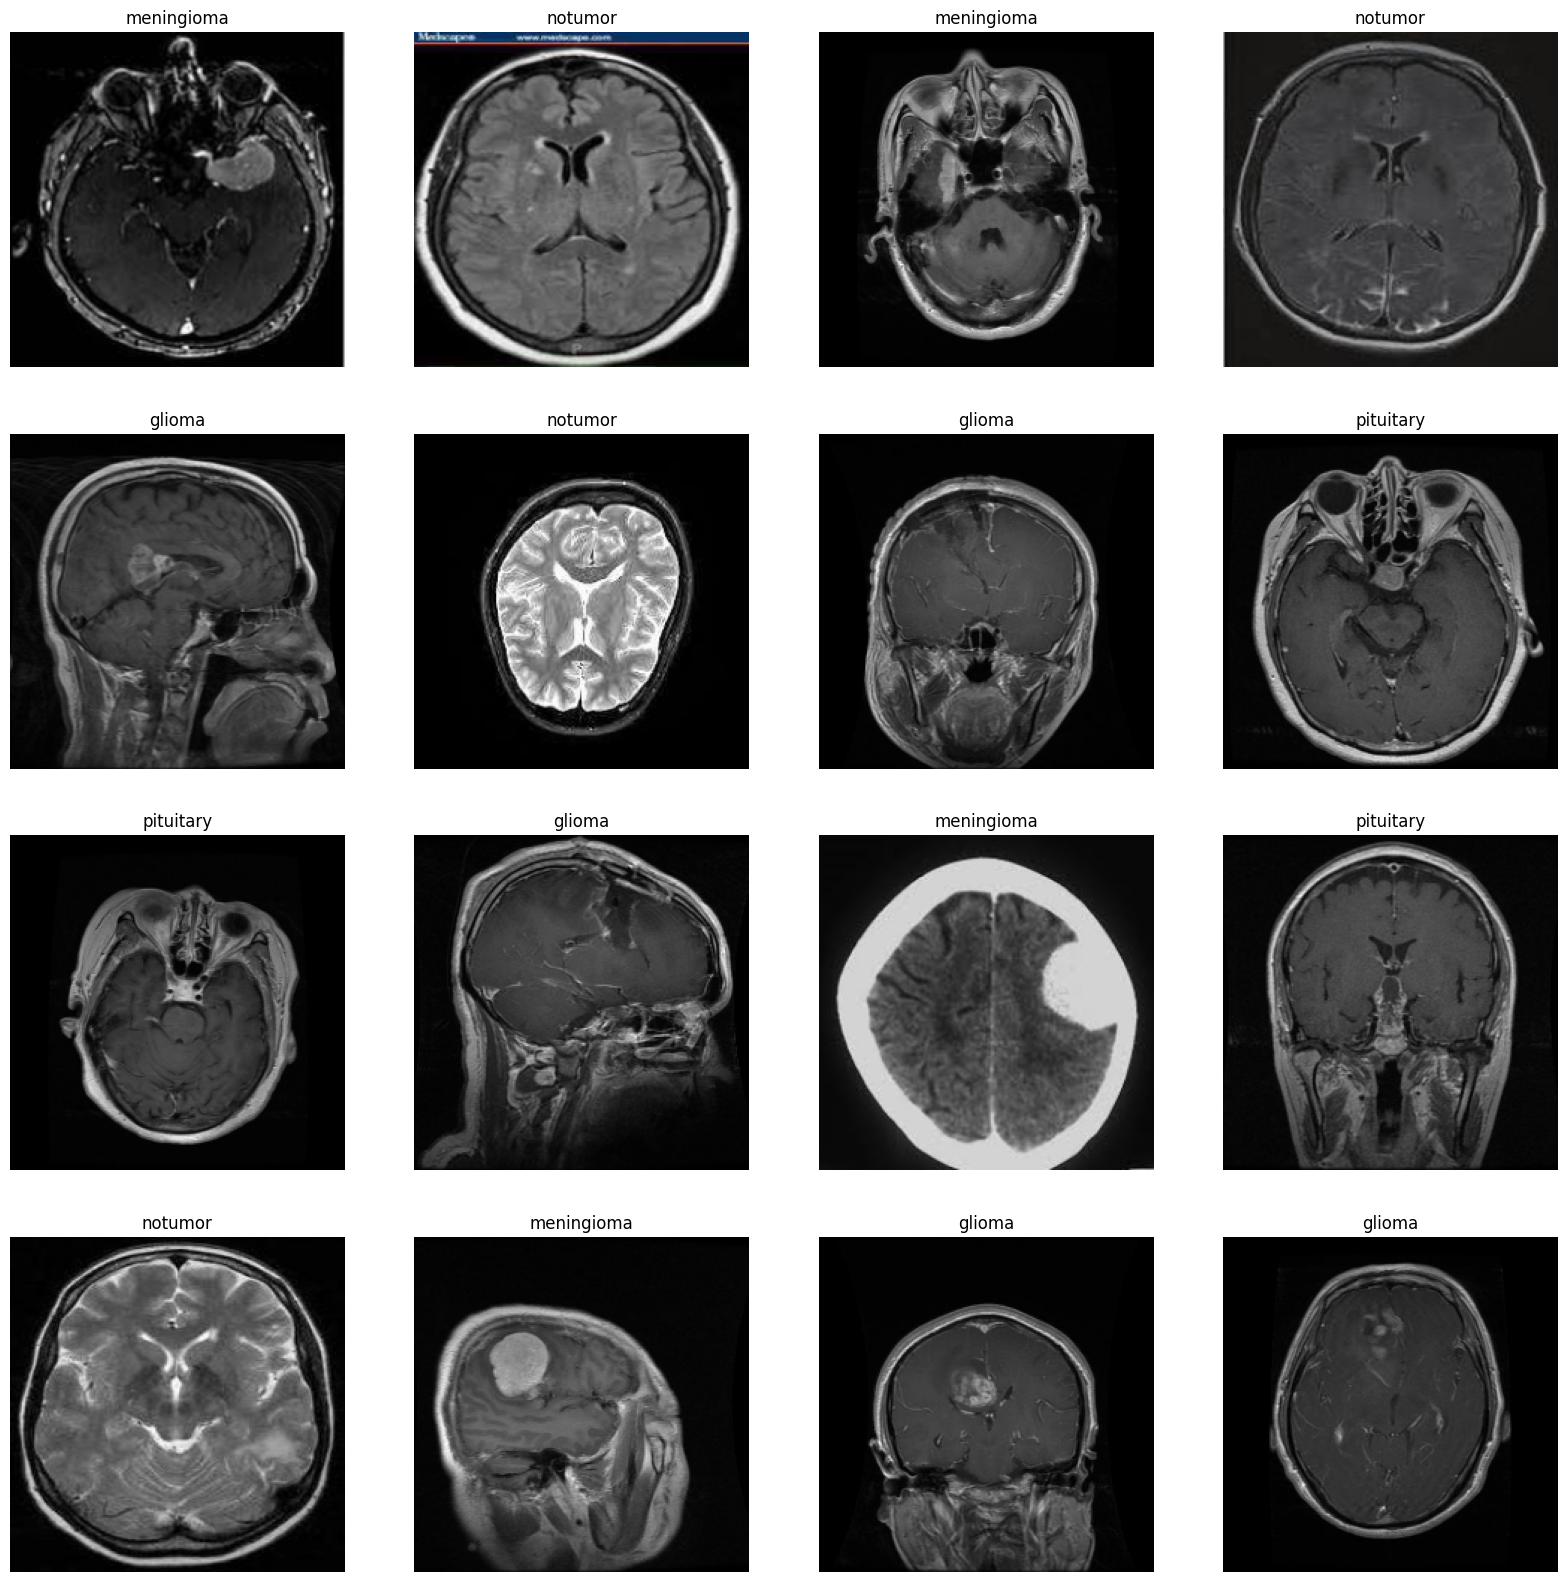

In [ ]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    classes ={'pituitary':0, 'notumor':1, 'meningioma':2, 'glioma':3}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_test[i]))

In [ ]:
x_pred=[]
files=gb.glob(pathname= str( pred + '/*.jpg'))

for file in files:
    imag=cv2.imread(file)

    image = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

    imagee= cv2.resize(image , (new_size,new_size))

    x_pred.append(list(imagee))
len(x_pred)

4

In [ ]:
#converting all TRAIN data to array
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)


X_train shape  : (5712, 224, 224, 3)
y_train shape : (5712,)


In [ ]:
#converting all TEST data to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (1311, 224, 224, 3)
y_test shape : (1311,)


In [ ]:
x_pred = np.array(x_pred)
print("x_pred shape  :" ,x_pred.shape)

x_pred shape  : (4, 224, 224, 3)


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,SeparableConv2D

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights = 'imagenet')
# mark loaded layers as not trainable
for layer in model.layers[:80]:
    layer.trainable = False

for layer in model.layers[80:]:
    layer.trainable = True

2023-10-26 21:26:32.028000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30725 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:89:00.0, compute capability: 7.0


In [ ]:
len(model.layers)

175

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
x=Flatten()(model.output)

x=Dropout(rate=0.5)(x)

x=Dense(512,activation = "relu")(x)
x=Dropout(rate=0.3)(x)
x=Dropout(rate=0.3)(x)

x=Dense(4, activation='softmax')(x)

model = Model(model.input, x)


In [ ]:
opt=tf.keras.optimizers.Adam(0.0001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy' , metrics='accuracy')

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler,TensorBoard

In [ ]:
earlystop=EarlyStopping(patience=5)
filepath = "model_class.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'model_log.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callbacks_list = [checkpoint, csv_logger,earlystop]

In [ ]:
X_train.shape,y_train.shape

((5712, 224, 224, 3), (5712,))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
test_data_gen  = ImageDataGenerator()
test = test_data_gen.flow(
      X_test,
      y_test,
      shuffle=True,
      batch_size=batch_size
      )

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import tensorflow as tf
import os
import logging

# Set the TensorFlow log level to suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # '2' suppresses INFO and WARNING messages

# Set the logging level for TensorFlow
tf.get_logger().setLevel(logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

history= model.fit(X_train,y_train,validation_data=test,epochs=15,verbose=1,batch_size=32,callbacks=[callbacks_list])


Epoch 1/15


2023-10-26 21:26:46.691774: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-10-26 21:26:48.233710: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x562c6e0e9990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-26 21:26:48.233746: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2023-10-26 21:26:48.239825: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-26 21:26:48.388179: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/179 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.8810

2023-10-26 21:27:14.454334: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_accuracy improved from -inf to 0.96262, saving model to model_class.h5
179/179 [==============================] - 44s 108ms/step - loss: 0.6625 - accuracy: 0.8810 - val_loss: 0.1270 - val_accuracy: 0.9626
Epoch 2/15
179/179 [==============================] - ETA: 0s - loss: 0.0995 - accuracy: 0.9716
Epoch 2: val_accuracy improved from 0.96262 to 0.97864, saving model to model_class.h5
179/179 [==============================] - 18s 103ms/step - loss: 0.0995 - accuracy: 0.9716 - val_loss: 0.0849 - val_accuracy: 0.9786
Epoch 3/15
178/179 [============================>.] - ETA: 0s - loss: 0.0424 - accuracy: 0.9872
Epoch 3: val_accuracy did not improve from 0.97864
179/179 [==============================] - 13s 73ms/step - loss: 0.0423 - accuracy: 0.9872 - val_loss: 0.1179 - val_accuracy: 0.9634
Epoch 4/15
178/179 [============================>.] - ETA: 0s - loss: 0.0441 - accuracy: 0.9891
Epoch 4: val_accuracy improved from 0.97864 to 0.98093, saving model to model_class.h5
1

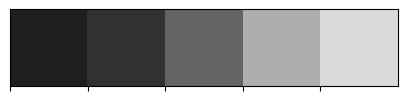

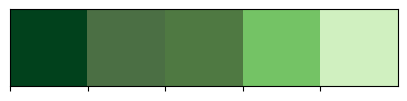

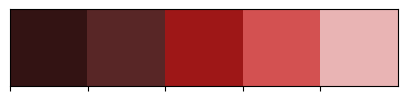

In [ ]:
import seaborn as sns
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

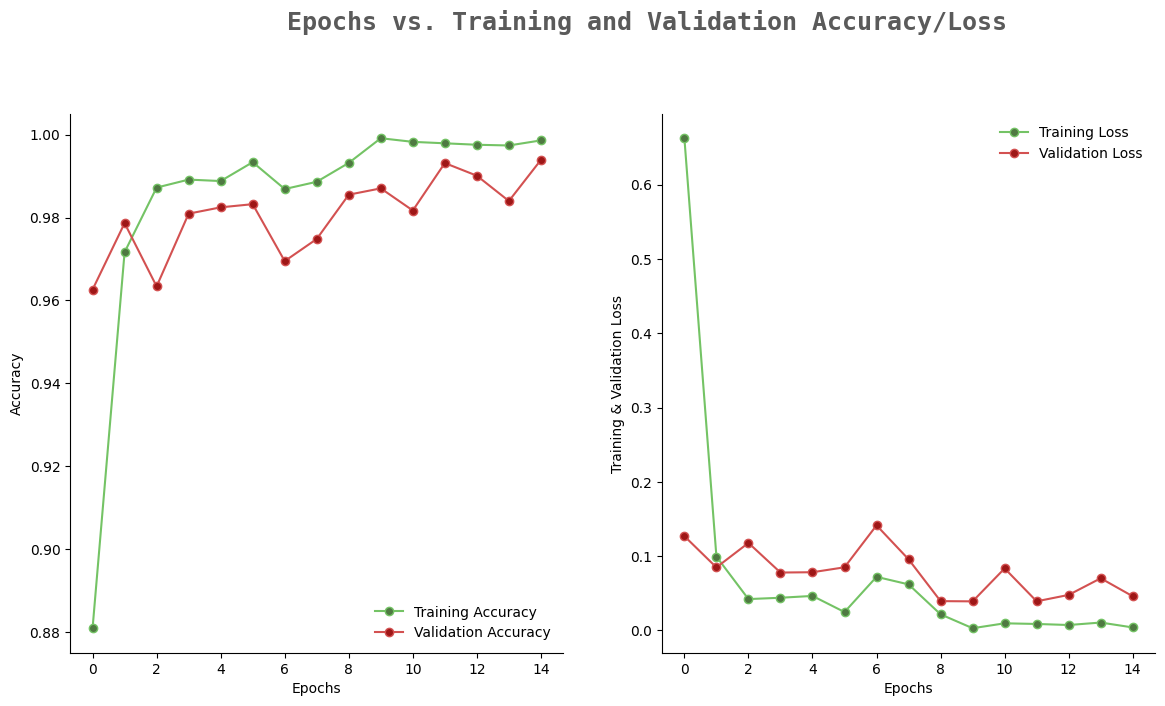

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from warnings import filterwarnings
filterwarnings('ignore')

epochs = [i for i in range(15)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

41/41 [==============================] - 2s 30ms/step


In [ ]:
y_test_new = y_test

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       300
           1       1.00      1.00      1.00       405
           2       0.99      0.98      0.99       306
           3       0.99      0.99      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



In [ ]:
labels = ['glioma','notumor','meningioma','pituitary']

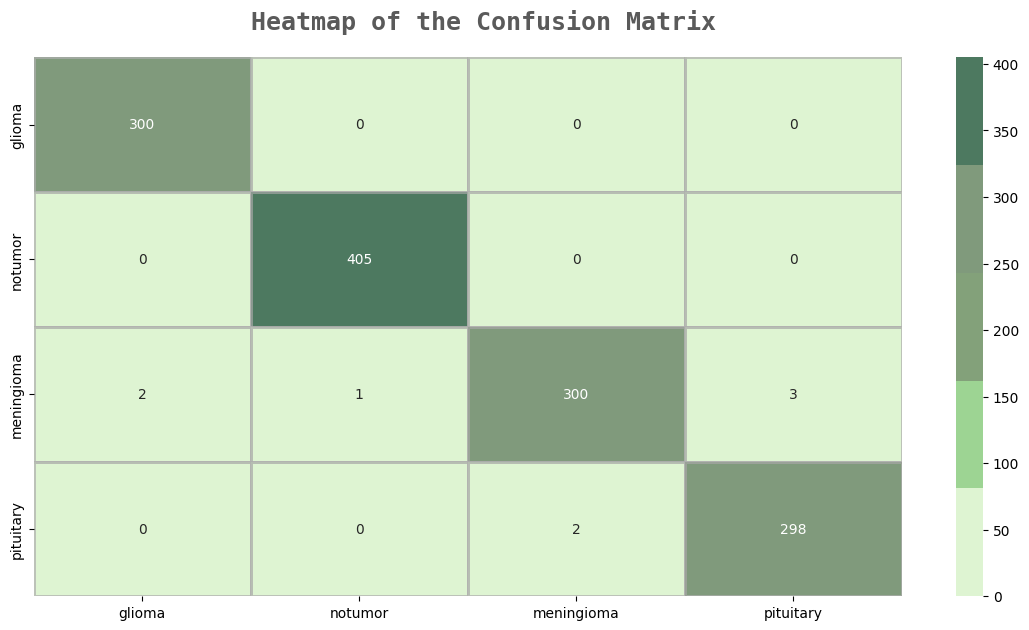

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Create a custom format function to display only whole numbers
def format_func(value):
    return f'{value:.0f}'  # This format will display whole numbers

sns.heatmap(confusion_matrix(y_test_new, pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
           fmt='d', cmap=colors_green[::-1], alpha=0.7, linewidths=2, linecolor=colors_dark[3])

fig.text(s='Heatmap of the Confusion Matrix', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.92, x=0.28, alpha=0.8)

plt.show()

In [ ]:
from keras.models import load_model

model = load_model('model_class.h5')
metrics = model.evaluate(X_test, y_test)

41/41 [==============================] - 2s 31ms/step - loss: 0.0460 - accuracy: 0.9939


In [ ]:
prediction = model.predict(X_test)
prediction.shape

41/41 [==============================] - 2s 29ms/step


(1311, 4)

In [ ]:
prediction = model.predict(x_pred)

1/1 [==============================] - 0s 351ms/step


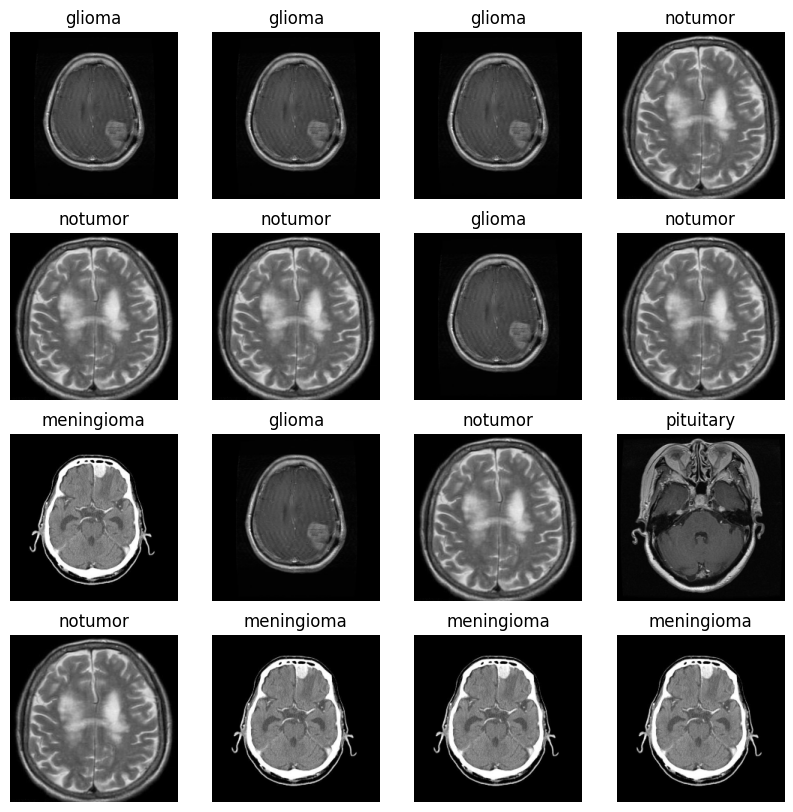

In [ ]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),16))) :
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(ImageClass(np.argmax(prediction[i])))